# Chapter 4. Training Models

## Linear Regression

![text](img/cap4/hipotese.png)

![text](img/cap4/hipotese_reg_linear_t.png)

### The MSE of a Linear Regression hypothesis hθ on a training set X is calculated using

![text](img/cap4/means_square_error.png)

## The Normal Equation


In [6]:
import numpy as np
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

### Now let’s compute   using the Normal Equation. We will use the inv() function from NumPy’s Linear Algebra module (np.linalg) to compute the inverse of a matrix, and the dot() method for matrix multiplication:

In [9]:
X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance 
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [10]:
theta_best

array([[4.06519969],
       [2.85639407]])

In [13]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.06519969],
       [9.77798784]])

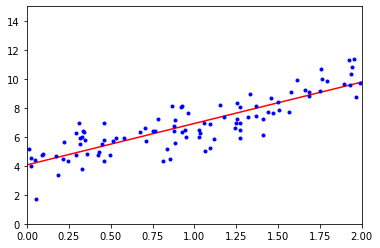

In [17]:
import matplotlib
import matplotlib.pyplot as plt
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

### Using SkitLearn


In [33]:
from sklearn.linear_model import LinearRegression

import numpy as np
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
X_new = np.array([[0], [2]])
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
lin_reg.intercept_, lin_reg.coef_

(array([4.16760155]), array([[2.83873523]]))

In [35]:
lin_reg.predict(X_new)

array([[4.16760155],
       [9.845072  ]])

## Computational Complexity

## Polynomial Regression

### What if your data is actually more complex than a simple straight line? Surprisingly, you can actually use a linear model to fit nonlinear data. A simple way to do this is to add powers of each feature as new features, then train a linear model on this extended set of features. This technique is called Polynomial Regression.

In [165]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

### Scikit-Learn’s PolynomialFeatures class to transform our training data, adding the square (2nd-degree polynomial) of each feature in the training set as new features (in this case there is just one feature):

In [174]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [175]:
X[0]

array([0.40868382])

In [176]:
X_poly[0]

array([0.40868382, 0.16702247, 0.06825938])

### X_poly now contains the original feature of X plus the square of this feature. Now you can fit a LinearRegression model to this extended training data

In [177]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.40650154]), array([[ 0.33786603,  2.76739262, -0.85140707]]))

### Note that when there are multiple features, Polynomial Regression is capable of finding relationships between features (which is something a plain Linear Regression model cannot do). This is made possible by the fact that PolynomialFeatures also adds all combinations of features up to the given degree. For example, if there were two features a and b, PolynomialFeatures with degree=3 would not only add the features a2, a3, b2, and b3, but also the combinations ab, a2b, and ab


Text(0.5, 1.0, 'Polynomial Degree = 2')

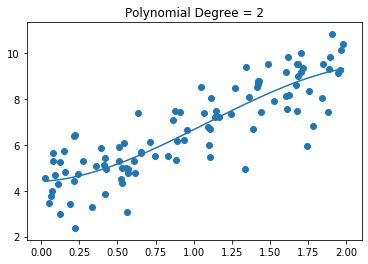

In [178]:
pred = lin_reg.predict(X_poly)

new_X, new_y = zip(*sorted(zip(X, pred))) # sort values for plotting
plt.plot(new_X, new_y)
plt.scatter(X,y)
plt.title("Polynomial Degree = 2")

In [179]:
X_poly

array([[4.08683823e-01, 1.67022467e-01, 6.82593803e-02],
       [2.15074740e-01, 4.62571438e-02, 9.94874318e-03],
       [8.74497153e-01, 7.64745270e-01, 6.68767561e-01],
       [7.11940991e-01, 5.06859974e-01, 3.60854392e-01],
       [9.56083661e-01, 9.14095968e-01, 8.73952219e-01],
       [1.67528788e+00, 2.80658948e+00, 4.70184533e+00],
       [1.06840195e+00, 1.14148273e+00, 1.21956238e+00],
       [1.14391962e+00, 1.30855209e+00, 1.49687840e+00],
       [1.43021748e+00, 2.04552205e+00, 2.92554140e+00],
       [1.36566985e+00, 1.86505413e+00, 2.54704818e+00],
       [3.94046132e-01, 1.55272354e-01, 6.11844707e-02],
       [1.41936424e+00, 2.01459484e+00, 2.85944387e+00],
       [8.63527310e-01, 7.45679416e-01, 6.43914540e-01],
       [1.47227045e-01, 2.16758027e-02, 3.19126438e-03],
       [1.89370107e+00, 3.58610376e+00, 6.79100853e+00],
       [1.88601174e+00, 3.55704028e+00, 6.70861973e+00],
       [5.11757912e-01, 2.61896161e-01, 1.34027432e-01],
       [8.92497284e-01, 7.96551

### how can you decide how complex your model should be? How can you tell that your model is overfitting or underfitting the data?

### used cross-validation to get an estimate of a model’s generalization performance. If a model performs well on the training data but generalizes poorly according to the cross-validation metrics, then your model is overfitting. If it performs poorly on both, then it is underfitting. This is one way to tell when a model is too simple or too complex.

### Another way is to look at the learning curves: these are plots of the model’s performance on the training set and the validation set as a function of the training set size. To generate the plots, simply train the model several times on different sized subsets of the training set. The following code defines a function that plots the learning curves of a model given some training data:

In [180]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


import numpy as np
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
X_new = np.array([[0], [2]])


def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2) 
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
        


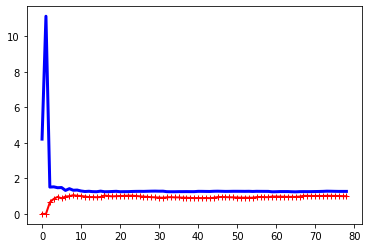

In [181]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

In [205]:

import numpy as np
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
X_new = np.array([[0], [2]])

from sklearn.pipeline import Pipeline
polynomial_regression = Pipeline((
("poly_features", PolynomialFeatures(degree=2, include_bias=False)), 
("lin_reg", LinearRegression()),
))

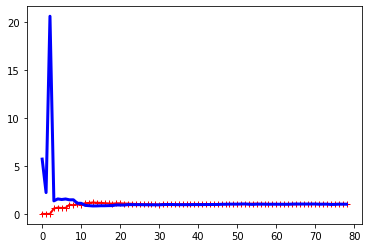

In [206]:
plot_learning_curves(polynomial_regression,X, y)

![text](img/cap4/tradeoff.png)

# Regularized Linear Models

### a good way to reduce overfitting is to regularize the model (i.e., to constrain it): the fewer degrees of freedom it has, the harder it will be for it to overfit the data. For example, a simple way to regularize a polynomial model is to reduce the number of polynomial degrees. For a linear model, regularization is typically achieved by constraining the weights of the model. We will now look at Ridge Regression, Lasso Regression, and Elastic Net, which implement three different ways to constrain the weights.

## Ridge Regression

#### Ridge Regression (also called Tikhonov regularization) is a regularized version of Linear Regression: a regularization term equal to   is added to the cost function. This forces the learning algorithm to not only fit the data but also keep the model weights as small as possible. Note that the regularization term should only be added to the cost function during training. Once the model is trained, you want to evaluate the model’s performance using the unregularized performance measure.